In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("incendios_completo.csv")

# Crear la variable objetivo: incendio catastrófico (1 si superficie >= 500 ha)
df['catastrico'] = (df['superficie'] >= 500).astype(int)

# Seleccionar variables de entrada
features = ['temp', 'tmin', 'tmax', 'prcp', 'wspd', 'pres', 'hum']

X = df[features]
y = df['catastrico']


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predecir y evaluar
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[46246     5]
 [  274     2]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     46251
           1       0.29      0.01      0.01       276

    accuracy                           0.99     46527
   macro avg       0.64      0.50      0.51     46527
weighted avg       0.99      0.99      0.99     46527



In [3]:
df['catastrico'].value_counts(normalize=True)

catastrico
0    0.994102
1    0.005898
Name: proportion, dtype: float64

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluar_modelo(y_test, y_pred):
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification report:")
    print(classification_report(y_test, y_pred, digits=3))


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Cargar datos
df = pd.read_csv("incendios_completo.csv")

# Crear variable objetivo
df['catastrico'] = (df['superficie'] >= 500).astype(int)

# Variables predictoras
features = ['temp', 'tmin', 'tmax', 'prcp', 'wspd', 'pres', 'hum']
X = df[features]
y = df['catastrico']

# Dividir datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 1. Eliminar NaNs
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

# 2. Asegurar tipo numérico
X_train = X_train.astype(float)

# 3. Confirmar que ambas clases existen
print("Distribución clases en entrenamiento:")
print(y_train.value_counts())

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Confirmar nuevo balance
print("Distribución después de SMOTE:")
print(y_train_bal.value_counts())

# Entrenar modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_bal, y_train_bal)

# Predecir en conjunto de prueba (original)
y_pred = clf.predict(X_test)

# Evaluar resultados
print("🔍 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\n📊 Reporte de clasificación:")
print(classification_report(y_test, y_pred, digits=3))


Distribución clases en entrenamiento:
catastrico
0    184188
1      1094
Name: count, dtype: int64
Distribución después de SMOTE:
catastrico
0    184188
1    184188
Name: count, dtype: int64
🔍 Matriz de confusión:
[[46126   127]
 [  267     7]]

📊 Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.994     0.997     0.996     46253
           1      0.052     0.026     0.034       274

    accuracy                          0.992     46527
   macro avg      0.523     0.511     0.515     46527
weighted avg      0.989     0.992     0.990     46527



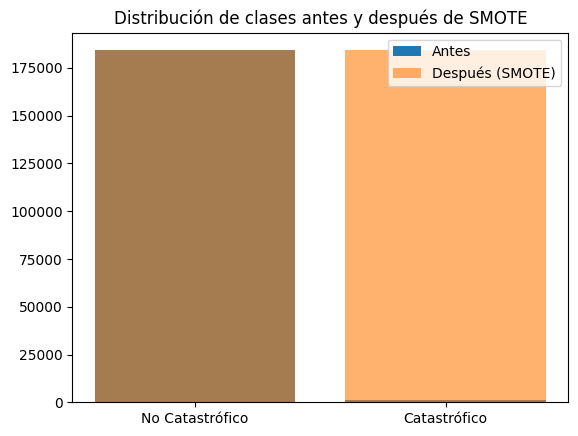

In [6]:
import matplotlib.pyplot as plt

plt.bar(['No Catastrófico', 'Catastrófico'], y_train.value_counts(), label="Antes")
plt.bar(['No Catastrófico', 'Catastrófico'], y_train_bal.value_counts(), alpha=0.6, label="Después (SMOTE)")
plt.title("Distribución de clases antes y después de SMOTE")
plt.legend()
plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Cargar dataset
df = pd.read_csv("incendios_completo.csv")

# Crear columna de mes
df['mes'] = pd.to_datetime(df['fecha']).dt.month

# Variables predictoras
features = ['temp', 'tmin', 'tmax', 'prcp', 'wspd', 'pres', 'hum',
            'time_ctrl', 'time_ext', 'personal', 'medios', 'mes']

# Limpiar datos (quitar NaNs o valores no numéricos)
df = df.dropna(subset=features + ['superficie'])
X = df[features]
y = df['superficie']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenar modelo
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

# Predecir
y_pred = reg.predict(X_test)

# Evaluar
print("📊 Evaluación del modelo de regresión:")
print(f"MAE  (Error absoluto medio):     {mean_absolute_error(y_test, y_pred):.2f} ha")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (Raíz error cuadrático):    {rmse:.2f} ha")
print(f"R²   (Coeficiente de determinación): {r2_score(y_test, y_pred):.3f}")

📊 Evaluación del modelo de regresión:
MAE  (Error absoluto medio):     22.55 ha
RMSE (Raíz error cuadrático):    157.37 ha
R²   (Coeficiente de determinación): 0.057


In [8]:
import joblib

# Guardar el modelo Random Forest
joblib.dump(reg, "modelo_prediccion_magn_incendio.pkl")

print("✅ Modelo guardado como 'modelo_prediccion_magn_incendio.pkl'")

✅ Modelo guardado como 'modelo_prediccion_magn_incendio.pkl'
